In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score

In [2]:
# Simulated transaction data [Transaction Amount ($), Number of Transactions per Day]

X = np.array([

    [20,1],[25,2],[18,1],[30,3],[40,2], # Normal transactions

    [5000,10],[7000,12], [15000,1],[12000,3] # Fraudulent Transactions


])

In [3]:
# Standardize the data

X_scaled = StandardScaler().fit_transform(X)

In [4]:
# Apply DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=2).fit(X_scaled)

labels = dbscan.labels_

In [5]:
# Compute the K-Nearest Neighbors distances

neighbors = NearestNeighbors(n_neighbors=2)

neighbors_fit = neighbors.fit(X_scaled)

distances, indices =neighbors_fit.kneighbors(X_scaled)

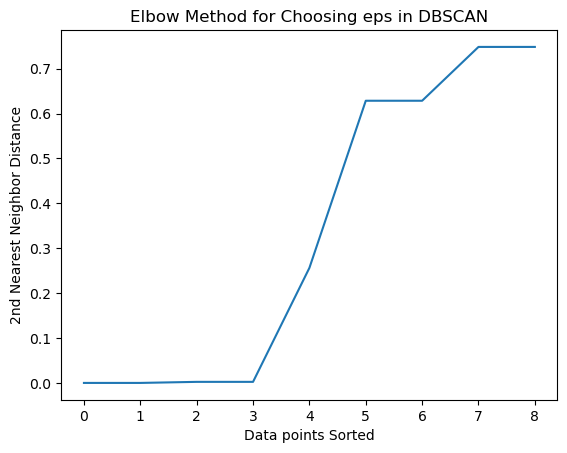

In [6]:
# Sort the distances to find the optimal eps

distances = np.sort(distances[:,1])  # Take second nearest neighbor distance

plt.plot(distances)

plt.xlabel("Data points Sorted")

plt.ylabel("2nd Nearest Neighbor Distance")

plt.title("Elbow Method for Choosing eps in DBSCAN")

plt.show()

In [7]:
# Set optimized parameters

optimal_eps = 0.6  # Adjust this based on the elbow point

optimal_min_samples = 3  # Higher value means stricter cluster formation

In [8]:
# Run DBSCAN with new parameters

dbscan_tuned = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples).fit(X_scaled)

labels_tuned = dbscan_tuned.labels_

1️⃣ Compute the Silhouette Score

In [9]:
# Exclude outliers (-1 label) before computing silhouette score

mask = labels_tuned != -1

if len(set(labels_tuned[mask])) > 1: # Silhouette requires at least 2 clusters

    sil_score = silhouette_score(X_scaled[mask],labels_tuned[mask])

    print(f"Silhouette Score: {sil_score:.4f}")

else:
    
    print("Silhouette Score cannot be computed (only one cluster found).")

Silhouette Score cannot be computed (only one cluster found).


✅ Interpretation:
Closer to 1 → Well-clustered points.
Near 0 → Overlapping clusters.
Below 0 → Poor clustering (points may be misclassified).